# Analyzing Airbnb data

Author: Enikő Gergely <br>
Date: March 02, 2020


# Introduction
In this notebook I analyze publicly available Airbnb data from http://insideairbnb.com/get-the-data.html. I use listings.csv data set from Paris, Île-de-France, France 07 November 2019.

# Importing packages, functions and dataset

In [2]:
# data analysis and wrangling
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

#import data to pandas dataframe
df= pd.read_csv('listings.csv')


In [2]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,33065009,Beautiful apartment center of Paris with terrace,28313443,Michael & Johanna,NaN,Bourse,48.86847,2.35209,Entire home/apt,256,2,29,2019-11-03,4.12,73,284
1,33008241,Magnificent apt located in the heart of Paris,248419822,Mickael,NaN,Temple,48.86512,2.35333,Entire home/apt,85,1,15,2019-11-01,2.18,1,5
2,39024702,Cosy flat 4P- 3e - Grands Boulevards,115296025,Lucas & Mathilde,NaN,Bourse,48.86914,2.34817,Entire home/apt,88,1,0,NaN,NaN,22,341
3,38382924,Cosy apartment in Montmartre,24650806,Sarah,NaN,Buttes-Montmartre,48.88619,2.33730,Entire home/apt,92,2,0,NaN,NaN,1,31
4,29010030,"Apartment in Pigalle, Paris",86758450,Laura,NaN,Buttes-Montmartre,48.88314,2.33878,Entire home/apt,85,2,4,2019-04-17,0.30,1,312


In [3]:
df.columns.values

array(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'], dtype=object)

In [4]:
len(df['id'].unique())

65493

In [5]:
len(df['host_id'].unique())

54894

In [6]:
len(df['neighbourhood'].unique())

20

# Missing values, outliers

### Missing values
There are no neighbourhood_groups in the neighbourhoods.csv thus the whole neighbourhood_group column is empty. We can simply remove the column.
Name and host_name columns are not important for our analysis so we can simply leave missing values as it is for now.
Last_review and reviews_per_month has many missing values. For those listings there has been no reviews yet. We can leave the missing values in the last_review column and input 0 to the reviews_per_month.

In [7]:
# Number of missing values in each column
missing_val_count_by_column = (df.isna().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

name                      67
host_name                 69
neighbourhood_group    65493
last_review            12891
reviews_per_month      12891
dtype: int64


In [8]:
#drop neighbourhood_group
df = df.drop('neighbourhood_group', axis=1)

In [9]:
#replacing all missing values in 'reviews_per_month' with 0
df.fillna({'reviews_per_month':0}, inplace=True)

# Number of missing values in each column
missing_val_count_by_column = (df.isna().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

name              67
host_name         69
last_review    12891
dtype: int64


Looking at the availability for next 365 days of the listings that has no reviews yet:
- 7840 are not available in next 365 days

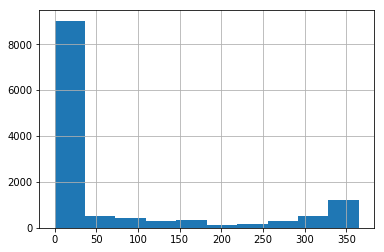

In [10]:
df[df.last_review.isna() == True]['availability_365'].hist()

In [12]:
df_no_review= df[df.last_review.isna() == True]
print("Has no reviews yet and not available in next 365 days:", len(df_no_review[df_no_review['availability_365']==0])) #not available in next 356 days

Has no reviews yet and not available in next 365 days: 7840


### Outliers
There are 65,493 airbnbs. Some suspicious numbers:
- price minimum and maximum: 0 and 10.000 (vs 121 average price)
- minimum_nights maximum: 9999
- reviews_per_month max: 47.38 (more than 30)
- calculated_host_listings_count maximum: 216

In [24]:
df.describe()

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,6.549300e+04,6.549300e+04,0.0,65493.000000,65493.000000,65493.000000,65493.000000,65493.000000,52602.000000,65493.000000,65493.000000
mean,2.097104e+07,7.491750e+07,NaN,48.864246,2.345422,121.597957,5.232926,20.007497,1.204227,5.779045,80.306521
std,1.211159e+07,8.647605e+07,NaN,0.018414,0.033487,225.741393,44.114105,40.668748,1.449854,22.193633,120.730193
min,3.109000e+03,2.419000e+03,NaN,48.813050,2.221200,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.971880e+06,1.208300e+07,NaN,48.850870,2.324270,60.000000,1.000000,1.000000,0.240000,1.000000,0.000000
50%,2.106242e+07,3.515001e+07,NaN,48.865460,2.348360,84.000000,2.000000,6.000000,0.710000,1.000000,3.000000
75%,3.253643e+07,1.104694e+08,NaN,48.879300,2.370750,120.000000,4.000000,20.000000,1.640000,1.000000,133.000000
max,3.994839e+07,3.078421e+08,NaN,48.905790,2.473390,10000.000000,9999.000000,844.000000,47.380000,216.000000,365.000000


#### price
There are 61 airbnbs in the 2.000-10.000 price range. Looking at the 8000+ ones, most of them are either hotels or Entire apartments. Looking at one example (Hotel Montalembert, Deluxe Room, Cosy & stylish) on airbnb website it seems to be a data issue since price is 450euro compared to 9028 in our dataset. It would worth to do some further analysis on these extreme high prices.

There are 8 airbnbs with 0 price. Half of them are not available and have no reviews yet, but the other 4 is available the whole year and have reviews yet as well. It can also be a data issue.

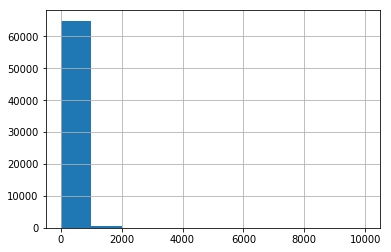

In [10]:
df['price'].hist()

61


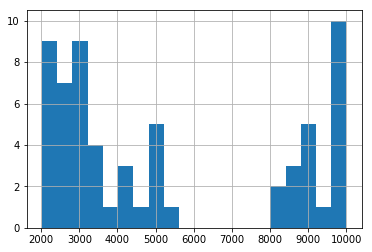

In [48]:
df[df['price']>2000]['price'].hist(bins = 20)
print(len(df[df['price']>2000]['price']))

In [47]:
df[df['price']>=8000]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
414,34378435,Studio 1 ou 2 Personnes 39216,157932055,Maeva,NaN,Vaugirard,48.85037,2.28476,Entire home/apt,9999,1,0,NaN,NaN,8,365
842,39791020,"Hotel Montalembert, Deluxe Room, Cosy & stylish",305494215,Montalembert,NaN,Palais-Bourbon,48.85761,2.32873,Private room,9028,1,0,NaN,NaN,4,321
843,39780641,"Hotel Montalembert, Superior room",305494215,Montalembert,NaN,Palais-Bourbon,48.85648,2.32759,Private room,9028,1,0,NaN,NaN,4,319
2876,34378432,3 Pièces 6 Personnes 39197,157932055,Maeva,NaN,Buttes-Chaumont,48.87689,2.38640,Entire home/apt,9999,1,0,NaN,NaN,8,365
5501,39791066,"Hotel Montalembert, Junior Suite",305494215,Montalembert,NaN,Palais-Bourbon,48.85599,2.32681,Private room,9028,1,0,NaN,NaN,4,290
6009,34378437,2 Pièces 4 Personnes 39217,157932055,Maeva,NaN,Vaugirard,48.85028,2.28478,Entire home/apt,9999,1,5,2019-10-24,1.58,8,365
6010,34378430,2 Pièces 4 Personnes 39196,157932055,Maeva,NaN,Buttes-Chaumont,48.87849,2.38722,Entire home/apt,9999,1,0,NaN,NaN,8,365
6046,39791131,"Hotel Montalembert, Suite",305494215,Montalembert,NaN,Palais-Bourbon,48.85712,2.32873,Private room,9028,1,0,NaN,NaN,4,303
12284,27608896,Petit studio parisien,170409506,Salma,NaN,Observatoire,48.83246,2.32396,Private room,9039,10,1,2018-08-12,0.07,1,0
14472,7225849,"Artistic apartment, Montmartre",34063120,Martin,NaN,Buttes-Montmartre,48.89011,2.34674,Entire home/apt,9379,2,23,2016-07-07,0.45,1,0


In [3]:
df[df['price'] ==0]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
8204,36271661,Fake Paris Local Laws MYS - don't book / delete,143799961,AirMattressFive,NaN,Observatoire,48.81917,2.33726,Entire home/apt,0,1,0,NaN,NaN,1,346
9465,27546389,Appartement familiale dans le 12ème,75946208,Camille,NaN,Reuilly,48.83750,2.40309,Entire home/apt,0,7,0,NaN,NaN,1,0
16241,19974916,Petit nid - village de Montmartre,54081344,Jean-Yves,NaN,Buttes-Montmartre,48.88861,2.34667,Entire home/apt,0,3,70,2019-11-02,2.66,1,365
33491,20962304,Beau deux pièces au cœur du 15e,76048174,Robin,NaN,Vaugirard,48.83758,2.29201,Entire home/apt,0,1,0,NaN,NaN,1,0
39593,20313940,Charming loft in the Upper Marais,11961861,Johnny,NaN,Temple,48.86431,2.35941,Entire home/apt,0,5,33,2019-09-26,1.25,1,351
39755,21258874,Joli T2 37m2 arrêt Maison Blanche,21893865,Marine,NaN,Gobelins,48.82287,2.36054,Entire home/apt,0,2,0,NaN,NaN,1,0
52611,20291987,Romantic Garden view near Champs-Elysées,66618414,Marc & Rumi,NaN,Passy,48.87008,2.27732,Entire home/apt,0,2,43,2019-10-17,1.66,5,352
64921,20219162,Nice & cosy parisian flat,24732919,Agathe,NaN,Buttes-Chaumont,48.89423,2.37519,Entire home/apt,0,3,2,2018-01-24,0.09,1,0


In [22]:
len(df[df['price'] <=10])

50

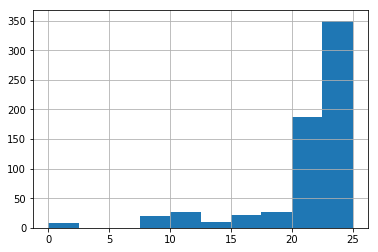

In [4]:
df[df['price'] <=25]['price'].hist()

#### minimum nights

There are 207 listings with more than 100 days (=3 months) as minimum nights. There is only one airbnb with 9999 which might be a default value for missing data. The second largest is 1125 days.

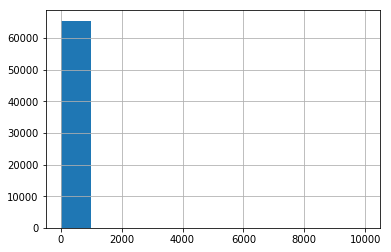

In [26]:
df['minimum_nights'].hist()

In [27]:
len(df[df['minimum_nights']>100]['minimum_nights'])

207

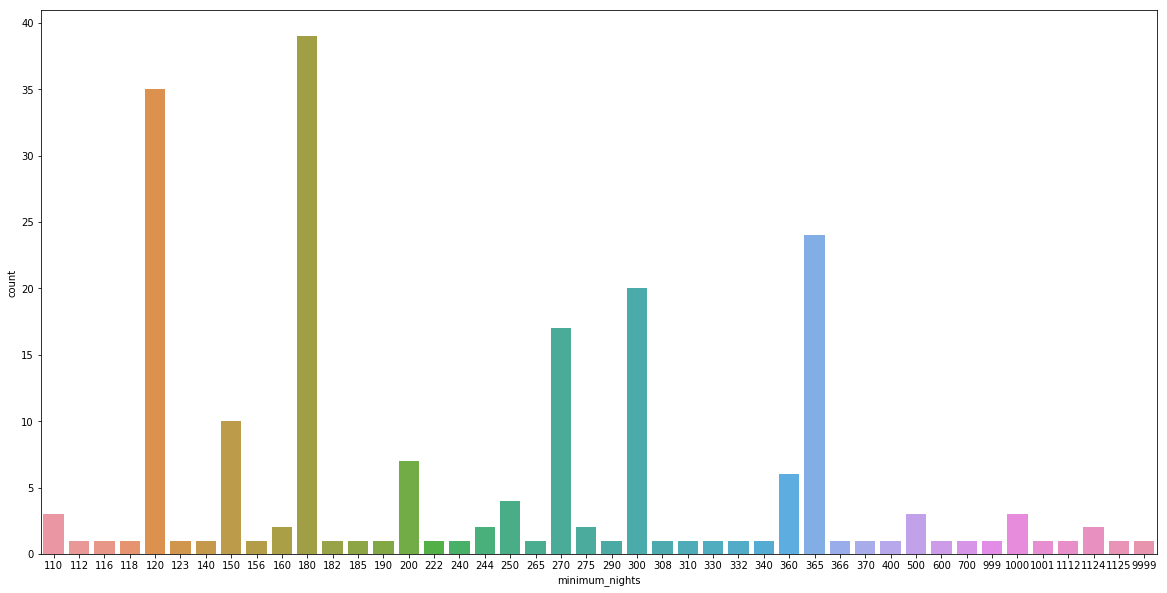

In [28]:
plt.figure(figsize=(20,10))
sns.countplot (df[df['minimum_nights']>100]['minimum_nights'],  label="Count")

#### Reviews per month
There are 3 airbnbs with more than 25 reviews per months. They are Hotel rooms or Shared rooms which might be available for more person at the same period.

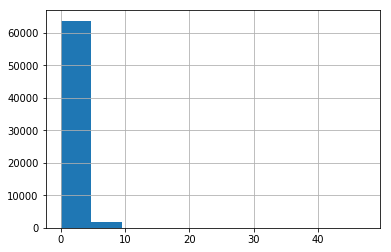

In [29]:
df['reviews_per_month'].hist()

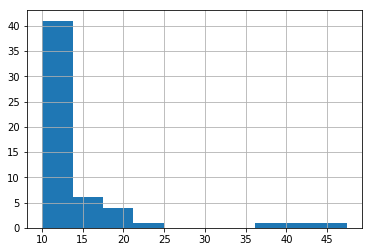

In [32]:
df[df['reviews_per_month']>10]['reviews_per_month'].hist()

In [35]:
df[df['reviews_per_month']>30]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
35089,32057469,Sweet Little Room near St Martin Canal,183489963,Naïm,Buttes-Chaumont,48.88685,2.37265,Hotel room,69,1,349,2019-10-31,38.35,9,338
39618,36063844,Generator -1 Bed in 10 Bed Dornitory,269738613,Generator,Entrepôt,48.87784,2.36964,Shared room,500,1,199,2019-10-25,47.38,8,365
47515,32204591,Cabin - Queen size bed - 5m²,240196971,JO&JOE Paris Gentilly,Observatoire,48.81723,2.33890,Hotel room,28,1,297,2019-10-22,40.50,10,364


#### Calculated host Listings count
There are some hosts with a high number of listings. 216 seems to be valid. They might be companies who handle other people's airbnbs. Most of its listings are highly availably in the next year and in normal price range.

In [39]:
host_listings = df.groupby('host_id', as_index = False)['id'].agg({'id': 'count'}).sort_values(by = 'id', ascending = False)
host_listings = host_listings.rename(columns={"id": "listings_count"})
host_listings.head(10)

,host_id,listings_count
38172,76104209,216
27350,33889201,182
9480,7642792,177
7220,6053288,130
2888,2667370,108
33755,50978178,106
17858,17037121,101
21067,21630783,94
2145,2107478,89
35768,62509540,84


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x113E6730>,
      dtype=object)

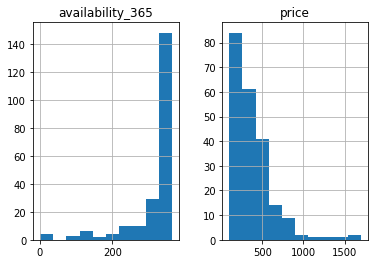

In [41]:
df[df['host_id']== 76104209][['availability_365', 'price']].hist()

I will keep the whole dataset for further analysis and not remove suspicious values since some further analysis would be needed to decide which ones are data issues and which are valid.

# Neighbourhoods

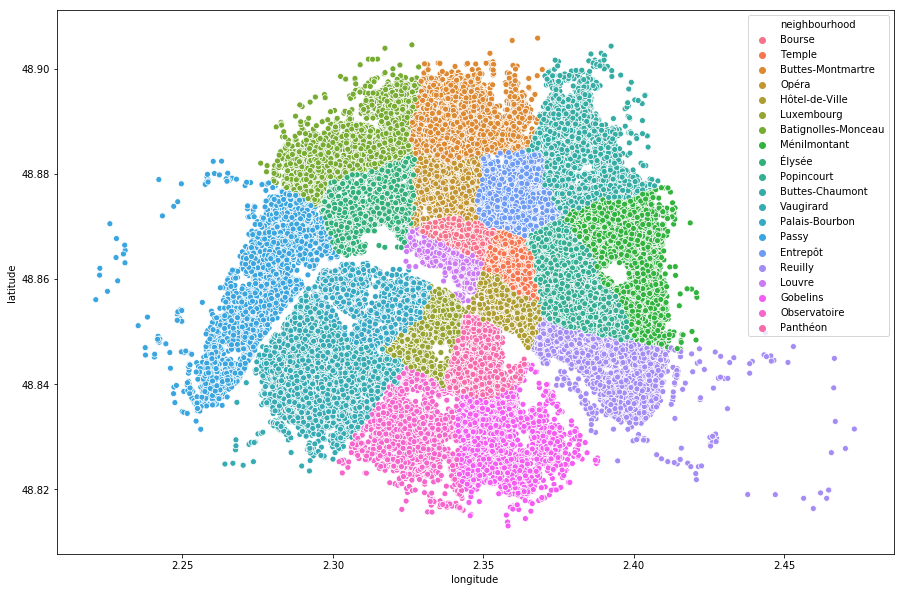

In [42]:
#visualize different neighbourhoods on map
plt.figure(figsize=(15,10))
sns.scatterplot(x="longitude", y="latitude",  data=df,  hue = "neighbourhood")

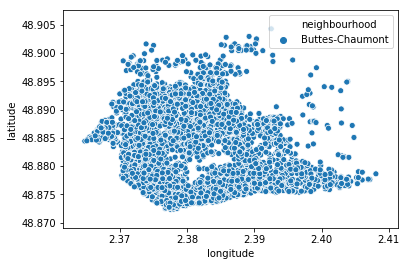

In [43]:
sns.scatterplot(x="longitude", y="latitude",  data=df[df['neighbourhood'] == 'Buttes-Chaumont'],  hue = "neighbourhood")

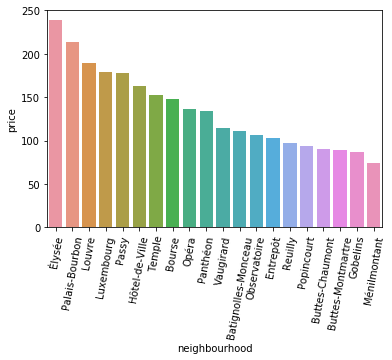

In [44]:
# average price by neighbourhood
mean_price_by_neighbourhood =  df.groupby('neighbourhood', as_index = False)['price'].agg( {'price': 'mean'}).sort_values(by='price', ascending = False)
plt.xticks(rotation=80)
sns.barplot(x='neighbourhood', y='price', data=mean_price_by_neighbourhood)

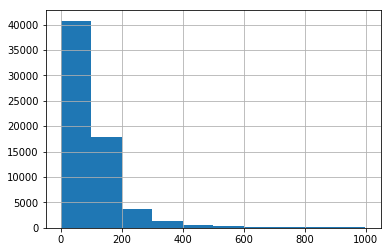

In [45]:
#there are some extreme values in prices, so I will exclue the listings larger than 400 as price.
df[df['price']<1000]['price'].hist()

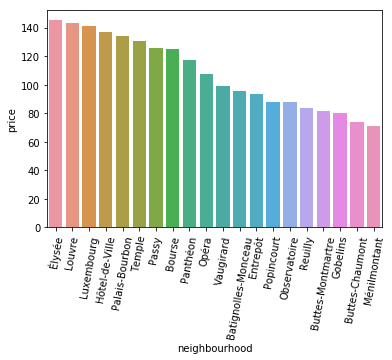

In [46]:
# average price by neighbourhood for listing below 400
mean_price_by_neighbourhood =  df[df['price']<=400].groupby('neighbourhood', as_index = False)['price'].agg( {'price': 'mean'}).sort_values(by='price', ascending = False)
plt.xticks(rotation=80)
sns.barplot(x='neighbourhood', y='price', data=mean_price_by_neighbourhood)

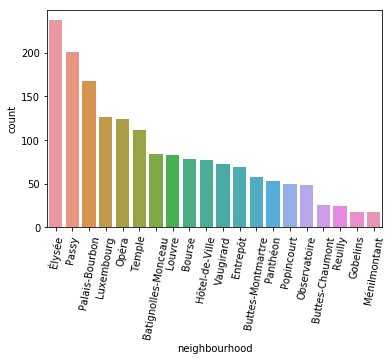

In [47]:
#number of listings in different neighbourhoods above 400
plt.xticks(rotation=80)
sns.countplot(df[df['price']>400]["neighbourhood"], label="Count", order = df[df['price']>400]['neighbourhood'].value_counts().index)

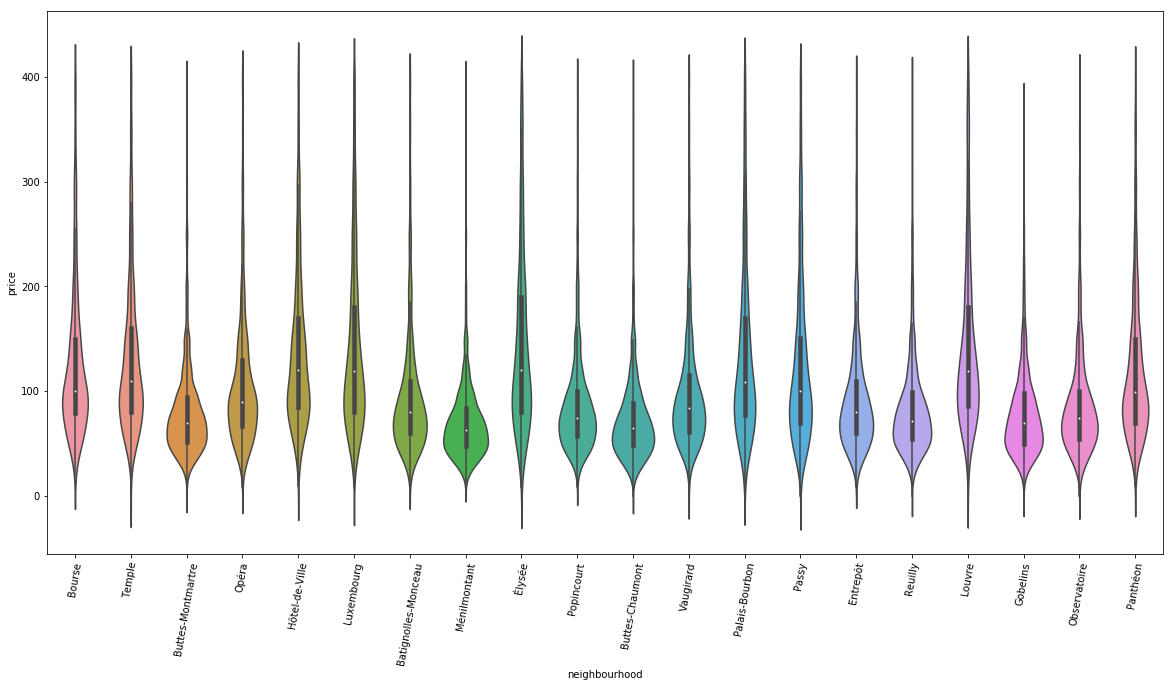

In [48]:
#violinplot to see distribtuion of prices  below 400
plt.figure(figsize=(20,10))
plt.xticks(rotation=80)
sns.violinplot(data=df[df['price']<=400], x='neighbourhood', y='price')


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

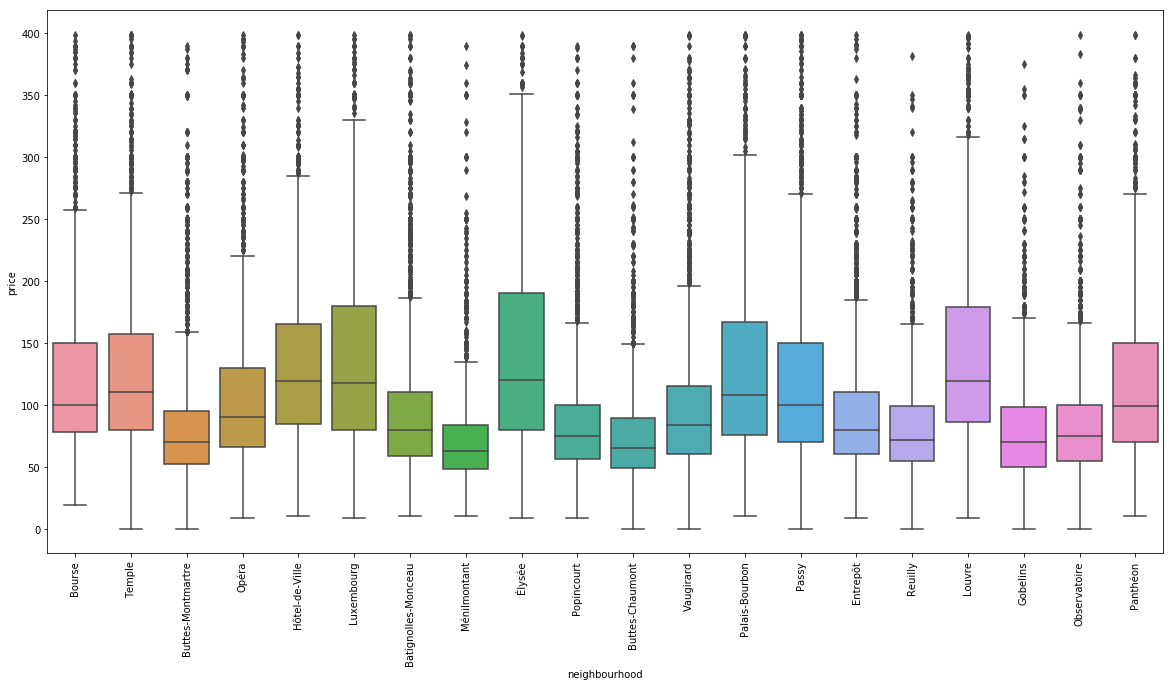

In [49]:
# boxplot to see distribution of prices below 400
plt.figure(figsize=(20,10))
sns.boxplot(x="neighbourhood", y="price",  data=df[df['price']<400])
plt.xticks(rotation=90)

Based on the violin- and boxplots, neighbourhoods with the highest range of prices are: Elysée, Louvre, Louxembourg, Hotel-de-Ville. The cheapest ones are: Menilmontant, Buttes-Chaumont. If we look at the neighbourhood map, the prices make sense. The cheaper neighbourhoods are more in the outer part of the city while the more expensive parts are in the center and around touristic attractions. 

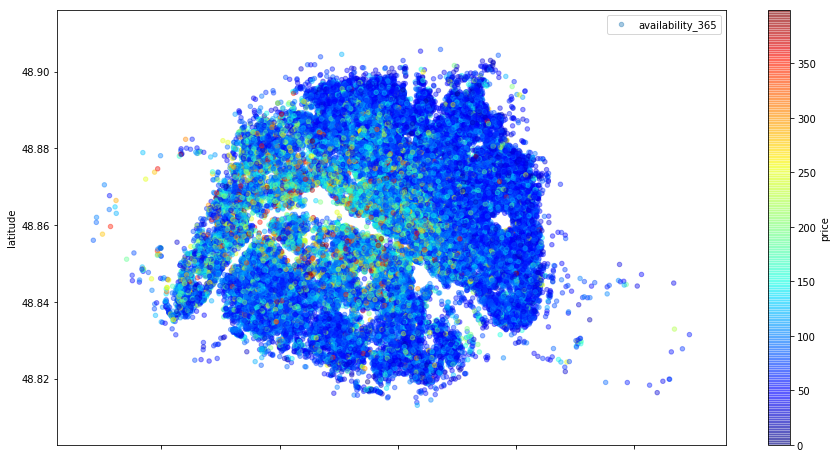

In [129]:
#heatmap scatterplot for listings below 400 
df[df['price']<400].plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price',
                  cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(15,8))

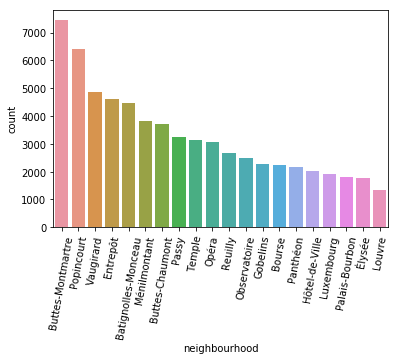

In [125]:
#number of listings in different neighbourhoods
plt.xticks(rotation=80)
sns.countplot(df["neighbourhood"], label="Count", order = df['neighbourhood'].value_counts().index)

The most expensive neighbourhoods are at the end of the list. it can be due to their size. Let's look at a combined chart of average price and number of listings. 

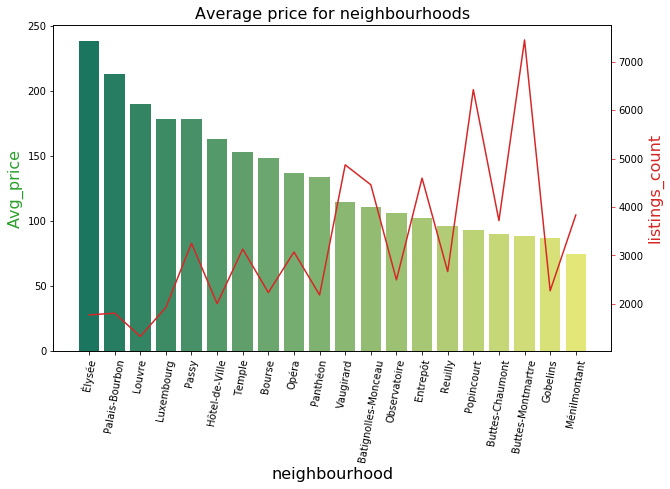

In [149]:
neighbourhood_combined = df.groupby('neighbourhood', as_index = False)['price', 'id'].agg( {'price': 'mean', 'id': 'count'}).sort_values(by='price', ascending = False)
neighbourhood_combined = neighbourhood_combined.rename(columns={"id": "listings_count", "price": "Avg_price"})

#Create combo chart
fig, ax1 = plt.subplots(figsize=(10,6))
color = 'tab:green'
plt.xticks(rotation=80)
#bar plot creation
ax1.set_title('Average price for neighbourhoods', fontsize=16)
ax1.set_xlabel('neighbourhood', fontsize=16)
ax1.set_ylabel('Avg. price', fontsize=16, color=color)
ax1 = sns.barplot(x='neighbourhood', y='Avg_price', data = neighbourhood_combined , palette='summer')
ax1.tick_params(axis='y')

#specify we want to share the same x-axis
ax2 = ax1.twinx()
color = 'tab:red'

#line plot creation
ax2.set_ylabel('Number of listings', fontsize=16, color=color)
ax2 = sns.lineplot(x='neighbourhood', y='listings_count', data =neighbourhood_combined, sort=False, color=color)
ax2.tick_params(axis='y', color=color)
#show plot
plt.show()

# Room type
Most listings are Entire home/apt.

In [206]:
df["room_type"].value_counts()

Entire home/apt    56467
Private room        6902
Hotel room          1690
Shared room          434
Name: room_type, dtype: int64

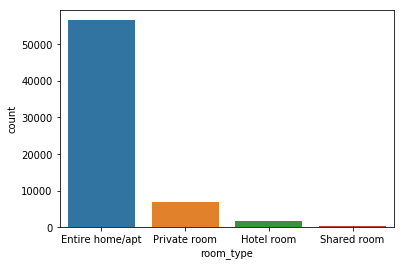

In [207]:
sns.countplot(df["room_type"], label="Count")

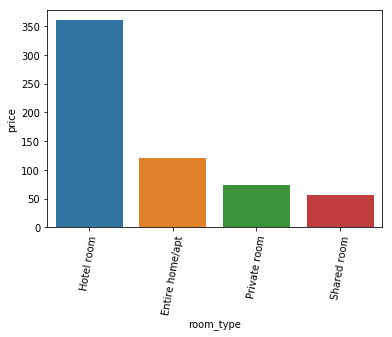

In [51]:
# average price by neighbourhood
plt.xticks(rotation=80)
mean_price_by_roomtype =  df.groupby('room_type', as_index =False)['price'].agg( {'price': 'mean'}).sort_values(by='price', ascending = False)
sns.barplot(x='room_type', y='price', data=mean_price_by_roomtype)

In [52]:
mean_price_by_roomtype

,room_type,price
1,Hotel room,360.242012
0,Entire home/apt,120.847274
2,Private room,73.375254
3,Shared room,56.882488


(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

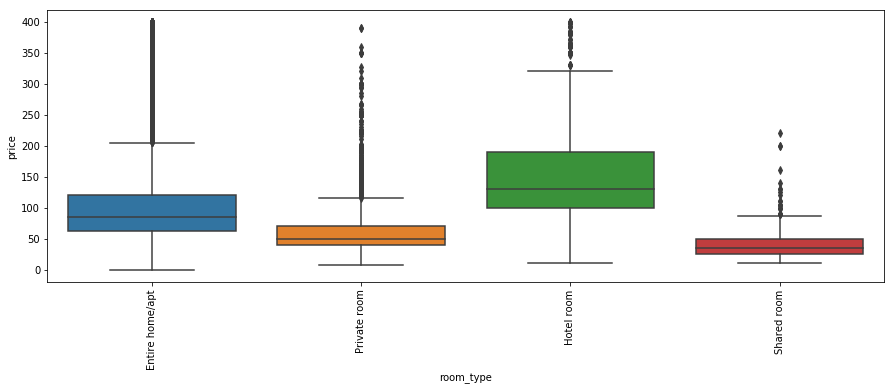

In [53]:
plt.figure(figsize=(15,5))
sns.boxplot(x="room_type", y="price",  data=df[df['price']<400])
plt.xticks(rotation=90)

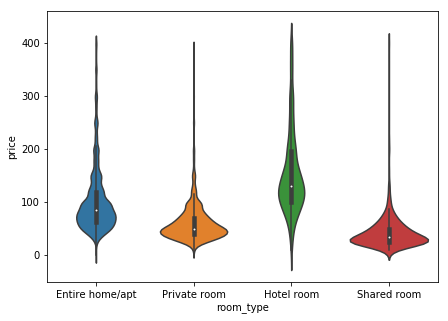

In [54]:
#violinplot to see distribtuion of prices  below 400
plt.figure(figsize=(7,5))
#plt.xticks(rotation=80)
sns.violinplot(data=df[df['price']<=400], x='room_type', y='price')


As expected, Hotel rooms have the largest range of price, followed by Entire home/apt. Private room and Shared room has similar distribution but Shared room prices are a little lower.

# Availability
Around half of the listings are not available in the next 365 days. They are either fully booked for the available periods or not available at all. 

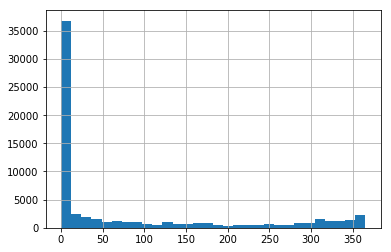

In [55]:
df['availability_365'].hist(bins=30)

In [56]:
print("available:", len(df[df['availability_365']!=0]['availability_365']))
print("not available:", len(df[df['availability_365']==0]['availability_365']))

available: 34536
not available: 30957


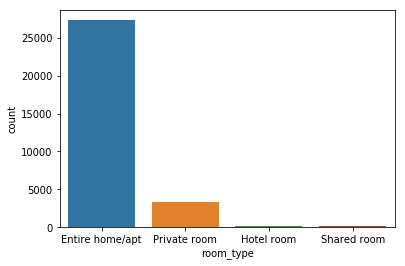

In [57]:
#room type for not available listings
sns.countplot(df[df['availability_365']== 0]["room_type"], label="Count")

# Reviews
18124 lising has not been reviewed in the last 6 months.
Top reviewed listing has 844 reviews. It is  a Private room in Popincourt neighbourhood with a price of 72. The average price of the top 10 most reviews listing is 174 which is higher than overall average due to an 999 price which might be data issue since name says 'Bed in a 4 Bed Mixed Dormitory within hostel'. Most of them are Private rooms or Entire home/apts.

In [59]:
print ("Average number of review", df['reviews_per_month'].mean())
print("Reviews in last 6 months:", len(df[df['last_review']> '2019-05-26']['availability_365']))
print("Latest review more than 6 months ago:", len(df[df['last_review']< '2019-05-26']['availability_365']))

Average number of review 0.9671990899790673
Reviews in last 6 months: 34423
Latest review more than 6 months ago: 18124


In [60]:
# top reviewed
df.sort_values(by = 'number_of_reviews', ascending = False).head(10)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
63359,629248,Charming room in spacious apartment,3125405,Maguy,Popincourt,48.85139,2.38544,Private room,72,1,844,2019-10-28,9.63,2,273
41498,1249964,A Journey Into The Heart Of Paris,6811343,Mike,Bourse,48.86624,2.34276,Private room,81,1,748,2019-11-06,9.66,1,245
59547,846954,Big room in a spacious apartment,3125405,Maguy,Popincourt,48.85258,2.38637,Private room,75,1,739,2019-11-07,8.85,2,280
38061,24745583,Bed in a 4 Bed Mixed Dormitory within hostel,180647809,Arty,Vaugirard,48.83258,2.30509,Hotel room,999,1,676,2019-10-27,19.48,7,364
38446,162163,Brand new Modern flat Central Paris Boutique H...,775000,Justin & Catherine,Élysée,48.87373,2.32456,Entire home/apt,59,1,631,2019-11-03,6.38,2,291
44380,20823,TWO FLOORS apartment in Paris 5eme,73530,Marie,Panthéon,48.83901,2.35463,Entire home/apt,130,2,604,2019-11-03,5.17,3,267
41670,240938,ROOM IN A CHARMING FLAT WITH TERRAC,1264200,Valérie,Bourse,48.86913,2.35184,Private room,55,1,603,2019-10-20,6.19,2,4
20386,2412144,room 50 sqm opéra madeleine Vendôme place,6920734,Marc,Opéra,48.87256,2.32899,Private room,80,2,594,2019-10-28,8.55,2,18
28575,2488829,Place de la Bastille.,12737796,Axel,Popincourt,48.85331,2.37171,Entire home/apt,55,1,576,2019-10-27,8.34,2,221
1870,35065,Lovely Loft Saint-Germain des Pres,150876,Benoit,Palais-Bourbon,48.85387,2.32440,Entire home/apt,132,1,568,2019-11-05,5.09,1,236


In [61]:
df.sort_values(by = 'number_of_reviews', ascending = False).head(10)['price'].mean()

173.8

# Host with most listings
The hist with the most listings has 216 airbnbs. Most of its listings are Entire home/apartments. The listings are not concentrated to specific neighbourhoods and their price ranges from 100 to 1700. Their average price is 385 which is higher than overall average of 122.

In [62]:
host_listings = df.groupby('host_id', as_index = False)['id'].agg({'id': 'count'}).sort_values(by = 'id', ascending = False)
host_listings = host_listings.rename(columns={"id": "listings_count"})
host_listings.head(10)

,host_id,listings_count
38172,76104209,216
27350,33889201,182
9480,7642792,177
7220,6053288,130
2888,2667370,108
33755,50978178,106
17858,17037121,101
21067,21630783,94
2145,2107478,89
35768,62509540,84


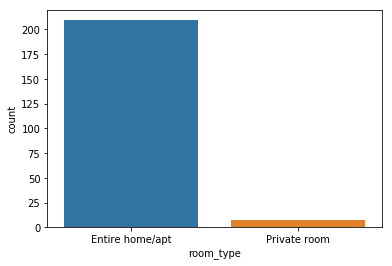

In [63]:
sns.countplot(df[df['host_id'] == 76104209] ["room_type"], label="Count")

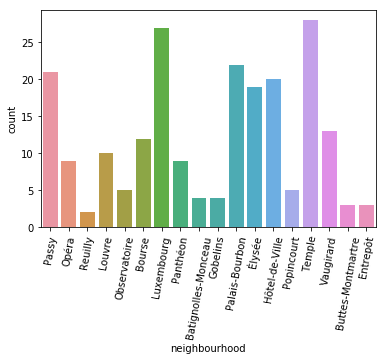

In [64]:
plt.xticks(rotation=80)
sns.countplot(df[df['host_id'] == 76104209] ["neighbourhood"], label="Count")

In [65]:
df ["price"].mean()

121.59795703357611

In [66]:
df[df['host_id'] == 76104209] ["price"].mean()

385.24074074074076

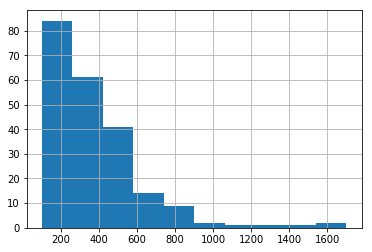

In [67]:
df[df['host_id'] == 76104209] ["price"].hist()

In [68]:
print("min", df[df['host_id'] == 76104209] ["price"].min())
print("max", df[df['host_id'] == 76104209] ["price"].max())

min 100
max 1700


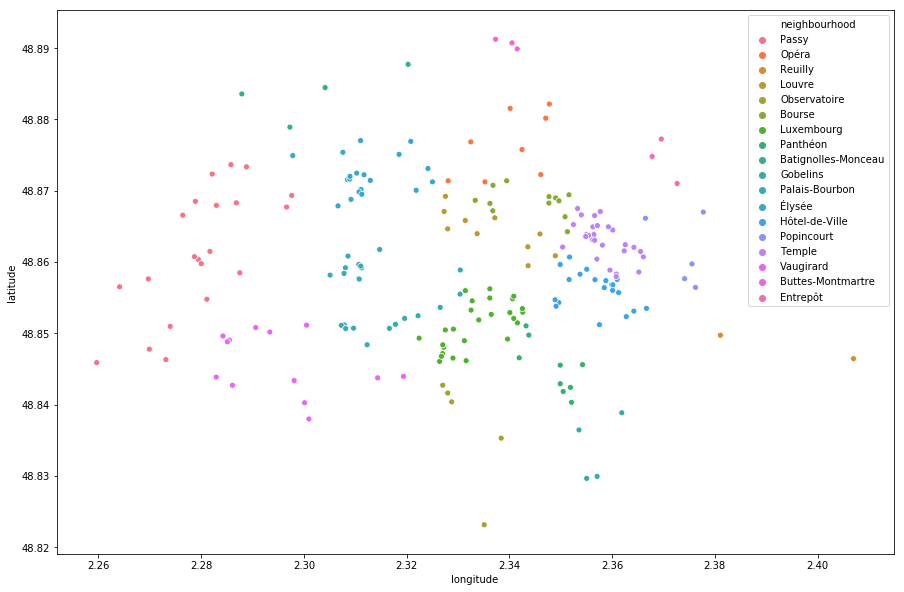

In [69]:
# map for listings
plt.figure(figsize=(15,10))

sns.scatterplot(x="longitude", y="latitude",  data=df[df['host_id'] == 76104209],  hue = "neighbourhood" )

# Most frequently used words in name of Airbnb
I will analyze the 'name' column and find the most frequently used words in the listings' names. I remove english and french stopwords to get a better top list.

First I need to remove NaN from the name column

In [70]:
df_for_names = df[df['name'].isnull() == False ]

In [71]:
#top 100 words used in names
word_freq_100= pd.Series(' '.join(df_for_names['name']).lower().split()).value_counts()[:100]
word_freq_100 = pd.DataFrame({'word':word_freq_100.index, 'count':word_freq_100.values}) 
word_freq_100.head(10)

,word,count
0,paris,15073
1,in,11927
2,studio,11096
3,appartement,9130
4,de,8436
5,apartment,7855
6,-,7577
7,the,7155
8,flat,6700
9,cosy,6372


[Text(0, 0, 'paris'),
 Text(0, 0, 'in'),
 Text(0, 0, 'studio'),
 Text(0, 0, 'appartement'),
 Text(0, 0, 'de'),
 Text(0, 0, 'apartment'),
 Text(0, 0, '-'),
 Text(0, 0, 'the'),
 Text(0, 0, 'flat'),
 Text(0, 0, 'cosy'),
 Text(0, 0, '2'),
 Text(0, 0, 'of'),
 Text(0, 0, 'montmartre'),
 Text(0, 0, 'near'),
 Text(0, 0, 'charming'),
 Text(0, 0, 'and'),
 Text(0, 0, 'à'),
 Text(0, 0, 'eiffel'),
 Text(0, 0, 'au'),
 Text(0, 0, 'with'),
 Text(0, 0, 'pièces'),
 Text(0, 0, 'marais'),
 Text(0, 0, 'heart'),
 Text(0, 0, '&'),
 Text(0, 0, 'charmant'),
 Text(0, 0, 'chambre'),
 Text(0, 0, 'et'),
 Text(0, 0, 'room'),
 Text(0, 0, 'du'),
 Text(0, 0, 'le')]

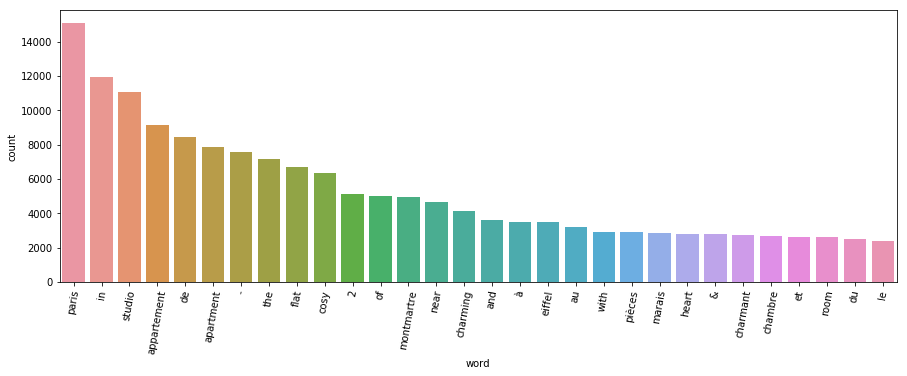

In [72]:
plt.figure(figsize=(15,5))
top_words=sns.barplot(x='word', y='count', data=word_freq_100[0:30])
top_words.set_xticklabels(top_words.get_xticklabels(), rotation=80)

There are many words like in, de, the, of which are not relevant so I will remove using french and english stopwords dictionaries.

In [73]:
import nltk
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

word_freq_100['is_stop'] = word_freq_100['word']

for i in range(0,len(word_freq_100)):
    if word_freq_100['word'][i] in stop_words:
        word_freq_100['is_stop'][i] = 'Y'
    else:
        word_freq_100['is_stop'][i] = 'N'
        
stop_words = set(stopwords.words('french'))

for i in range(0,len(word_freq_100)):
    if word_freq_100['is_stop'][i] == 'N':
        if word_freq_100['word'][i] in stop_words:
            word_freq_100['is_stop'][i] = 'Y'      

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


[Text(0, 0, 'paris'),
 Text(0, 0, 'studio'),
 Text(0, 0, 'appartement'),
 Text(0, 0, 'apartment'),
 Text(0, 0, '-'),
 Text(0, 0, 'flat'),
 Text(0, 0, 'cosy'),
 Text(0, 0, '2'),
 Text(0, 0, 'montmartre'),
 Text(0, 0, 'near'),
 Text(0, 0, 'charming'),
 Text(0, 0, 'eiffel'),
 Text(0, 0, 'pièces'),
 Text(0, 0, 'marais'),
 Text(0, 0, 'heart'),
 Text(0, 0, '&'),
 Text(0, 0, 'charmant'),
 Text(0, 0, 'chambre'),
 Text(0, 0, 'room'),
 Text(0, 0, 'coeur'),
 Text(0, 0, 'lovely'),
 Text(0, 0, 'proche'),
 Text(0, 0, 'beautiful'),
 Text(0, 0, 'tower'),
 Text(0, 0, 'nice'),
 Text(0, 0, 'canal'),
 Text(0, 0, 'parisian'),
 Text(0, 0, 'calme'),
 Text(0, 0, 'bright'),
 Text(0, 0, 'lumineux')]

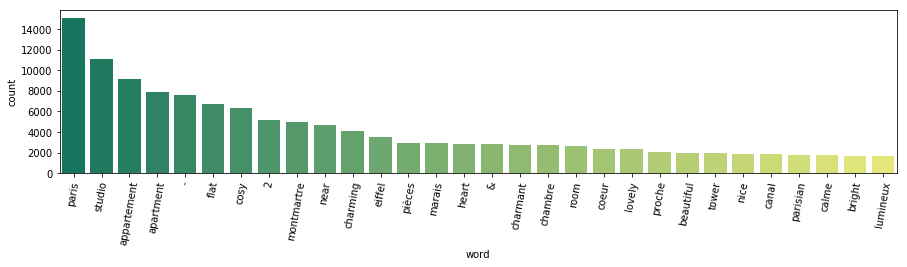

In [74]:
plt.figure(figsize=(15,3))
top_words=sns.barplot(x='word', y='count', data=word_freq_100[word_freq_100['is_stop'] == 'N'][0:30] , palette='summer')
top_words.set_xticklabels(top_words.get_xticklabels(), rotation=80)

The most popular words are related to the listing description like type (studio, apartment, flat, room) and location (Paris, montmartre, near, eiffel). There are some popular catchphrases like cosy, charming, lovely, beautiful, calme, bright. Most of the top words are there in both english and french.